In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [115]:
base_dir = "input_output/"
sum1 = "summary_recurrent.txt"
sum2 = "summary_UT_ff.txt"
sum3 = "summary_UT_sep.txt"
casp = "casp12.txt"
plot_dir = "plots/"

In [116]:
def create_df(file1, file2, file3, casp_map, plot_dir):
    """Parse two summary files and create a table
    
    Args:
        file1, file2: summary files to parse
        casp_map: a file that maps protein name to FM or TBM in CASP
        outfile: file to write to
    
    Returns:
        None
    """

    def parse_file(file, num):
        
        tm_score = 'TMScore{}'.format(num)
        rmsd = 'RMSD{}'.format(num)
        df = pd.read_csv(file, delimiter='\t').set_index('Name')
        df.columns = [tm_score, rmsd]
        df[tm_score] = df[tm_score].round(2)
        df[rmsd] = df[rmsd].round(1)
        return df

    casp_map = open(casp_map, "r").read().split('\n')[1:][:-1]
    casp_dict = dict()
    for line in casp_map:
        row_values = line.split()
        casp_dict['T0' + row_values[0]] = row_values[1]
    
    d1 = parse_file(file1, 1)
    d2 = parse_file(file2, 2)
    d3 = parse_file(file3, 3)
    
    df = pd.concat([d1, d2, d3], axis=1, sort=True)
    
    df['Casp_classification'] = df.index.map(casp_dict)
    return df

df = create_df(base_dir + sum1, base_dir + sum2, base_dir + sum3, base_dir + casp, base_dir + plot_dir)

In [117]:
df.head()

,TMScore1,RMSD1,TMScore2,RMSD2,TMScore3,RMSD3,Casp_classification
Average,0.19,18.5,0.19,18.2,0.20,17.4,NaN
T0859,0.14,17.7,0.16,14.2,0.17,15.0,F
T0860,0.17,16.5,0.16,16.0,0.18,14.4,T
T0861,0.22,18.6,0.20,19.0,0.22,16.9,T
T0862,0.16,17.5,0.12,17.6,0.20,14.5,F


In [118]:
def create_plot(df, x, y, xlabel, ylabel, save_name):
    
    df_F = df[df['Casp_classification'] == 'F']
    df_T = df[df['Casp_classification'] == 'T']
    
    def plot_type(df, title, type_):
        grid = sns.JointGrid(df[x], df[y], space=0, size=8, ratio=10)
        grid.set_axis_labels(xlabel, ylabel)
        grid.plot_joint(plt.scatter, color="black")
        plt.plot([0, 35], [0, 35], linewidth=1, linestyle='--')
        plt.suptitle(title)

        type_ = type_.replace(' ', '_')
        grid.savefig(save_name + type_ + '.eps', format='eps', dpi=1000)
        
    plot_type(df_F, 'FM CASP12 Targets', '_F')
    plot_type(df_T, 'TBM CASP12 Targets', '_T')

In [123]:
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":15}) 

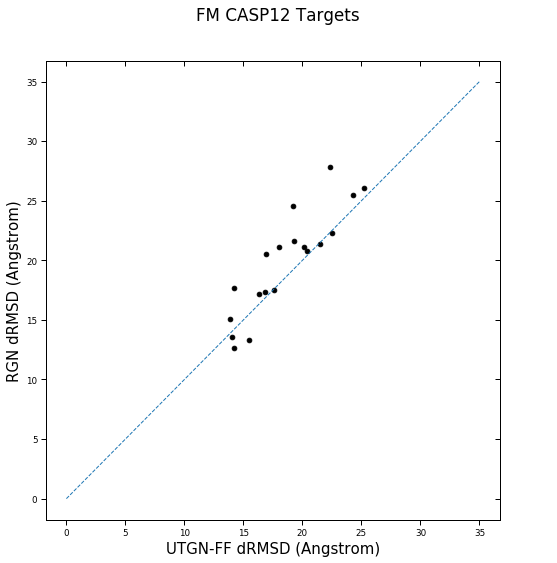

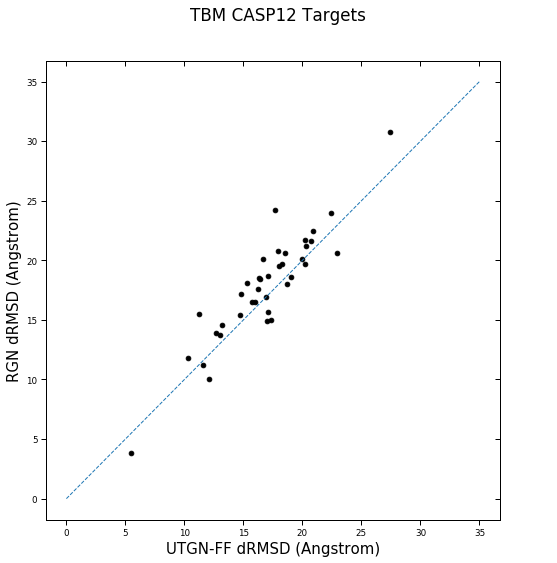

In [126]:
create_plot(
    df, 
    'RMSD2',
    'RMSD1',
    "UTGN-FF dRMSD (Angstrom)", 
    "RGN dRMSD (Angstrom)", 
    base_dir + plot_dir + 'ut_ff_recurrent')

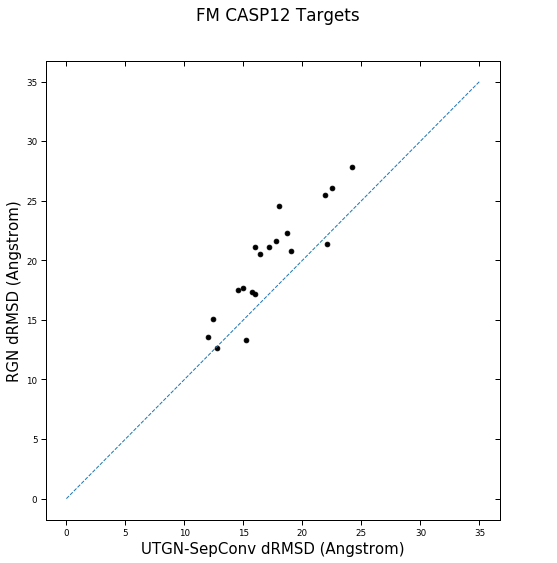

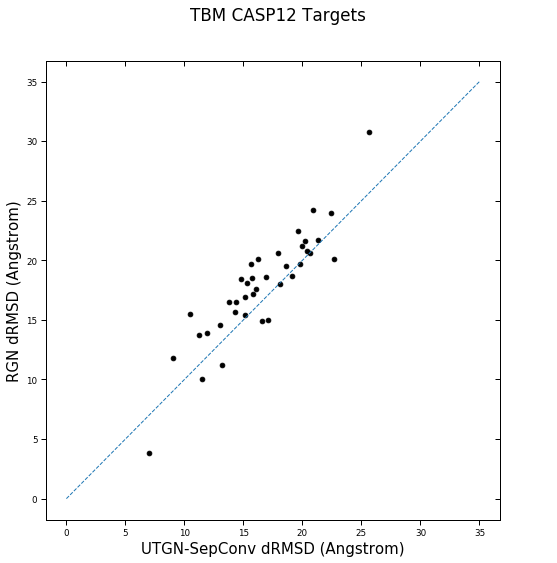

In [127]:
create_plot(
    df, 
    'RMSD3',
    'RMSD1',
    "UTGN-SepConv dRMSD (Angstrom)", 
    "RGN dRMSD (Angstrom)", 
    base_dir + plot_dir + 'ut_sep_recurrent')

In [106]:
df_T = df[df['Casp_classification'] == 'T']
df_F = df[df['Casp_classification'] == 'F']

In [111]:
df_T.describe()

,TMScore1,RMSD1,TMScore2,RMSD2,TMScore3,RMSD3
count,38.000000,38.000000,42.000000,42.00000,42.000000,42.000000
mean,0.200000,17.831579,0.198095,17.60000,0.208333,17.080952
std,0.054673,4.574967,0.032703,4.52543,0.036151,4.317928
min,0.150000,3.800000,0.150000,5.50000,0.160000,7.000000
25%,0.180000,15.425000,0.170000,15.40000,0.180000,14.500000
50%,0.190000,18.250000,0.190000,17.20000,0.210000,16.750000
75%,0.210000,20.475000,0.220000,20.20000,0.227500,20.150000
max,0.490000,30.800000,0.300000,28.40000,0.310000,27.200000


In [112]:
df_F.describe()

,TMScore1,RMSD1,TMScore2,RMSD2,TMScore3,RMSD3
count,19.000000,19.000000,21.000000,21.000000,21.000000,21.000000
mean,0.180526,19.847368,0.173810,19.357143,0.194286,18.066667
std,0.025706,4.431123,0.023553,4.459997,0.035010,4.316403
min,0.140000,12.600000,0.120000,13.900000,0.150000,12.000000
25%,0.165000,17.250000,0.160000,16.300000,0.170000,15.200000
50%,0.180000,20.800000,0.170000,19.200000,0.180000,17.200000
75%,0.200000,21.950000,0.190000,22.300000,0.210000,21.900000
max,0.230000,27.800000,0.220000,31.600000,0.280000,28.500000
